In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Getting Started

### Loading data

In [2]:
data = pd.read_csv('/content/voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Checking for null values

In [3]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

### Dataframe shape

In [4]:
data.shape

(3168, 21)

In [5]:
print("Total number of labels: {}".format(data.shape[0]))
print("Number of male: {}".format(data[data.label == 'male'].shape[0]))
print("Number of female: {}".format(data[data.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


# Visualizations

### Correlation among features

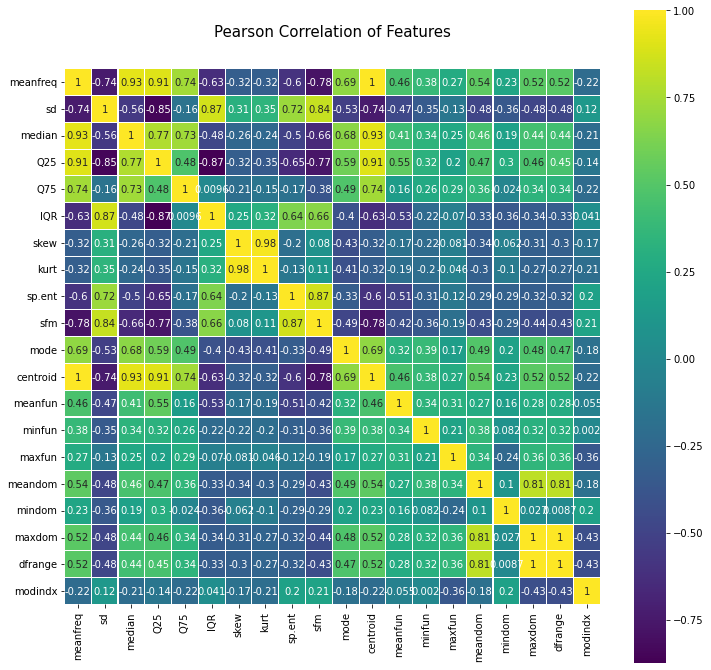

In [6]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.iloc[:,:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

### TNSE

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


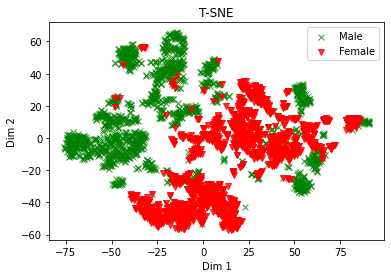

In [7]:
X = data.iloc[:, :-1]
y = data['label']
y = y.replace({'male':1,'female':0})

# Rescale data before TSNE
X_scale = StandardScaler().fit_transform(X)

# Sklearn TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_t = tsne.fit_transform(X_scale)

plt.figure()
plt.scatter(X_t[np.where(y == 0), 0],
                   X_t[np.where(y == 0), 1],
                   marker='x', color='g',
                   linewidth='1', alpha=0.8, label='Male')
plt.scatter(X_t[np.where(y == 1), 0],
                   X_t[np.where(y == 1), 1],
                   marker='v', color='r',
                   linewidth='1', alpha=0.8, label='Female')

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('T-SNE')
plt.legend(loc='best')
plt.show()  

### Scatter plot of given features
You can compare other features by simply change "meanfun" and "meanfreq"

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


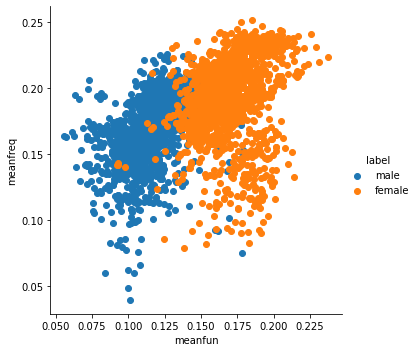

In [8]:
sns.FacetGrid(data, hue="label", size=5)\
   .map(plt.scatter, "meanfun", "meanfreq")\
   .add_legend()
plt.show()

### Boxplot
You can visualize other features by substituting "meanfun"

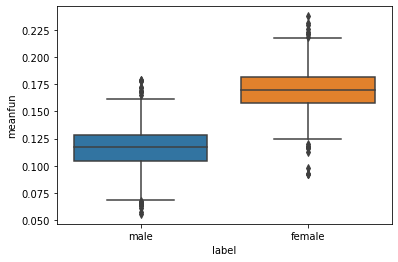

In [9]:
sns.boxplot(x="label",y="meanfun",data=data)
plt.show()

### Visualizing multiple feature relations

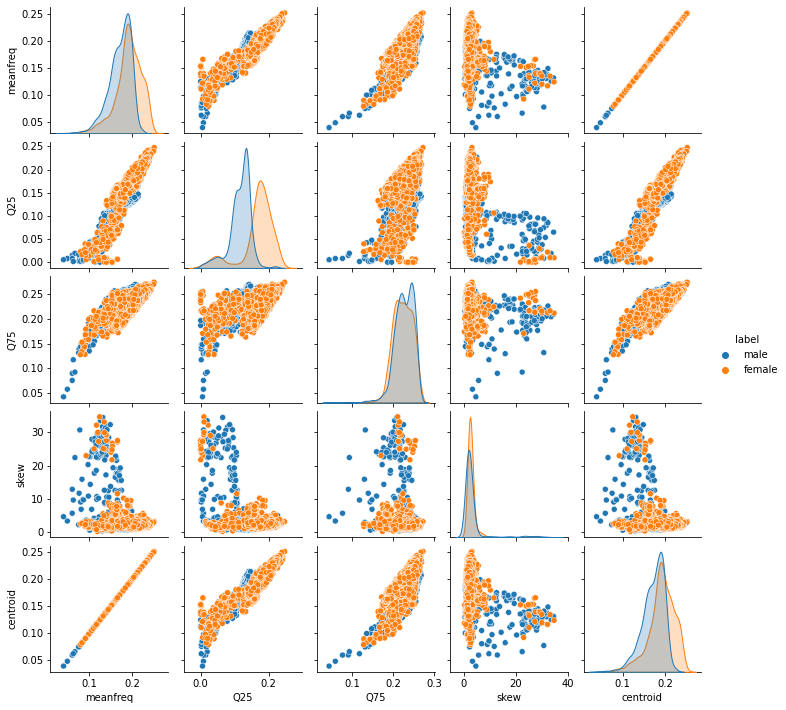

In [14]:
sns.pairplot(data[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], 
                 hue='label', height=2)
plt.show()

### Distribution of male and female(every feature)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


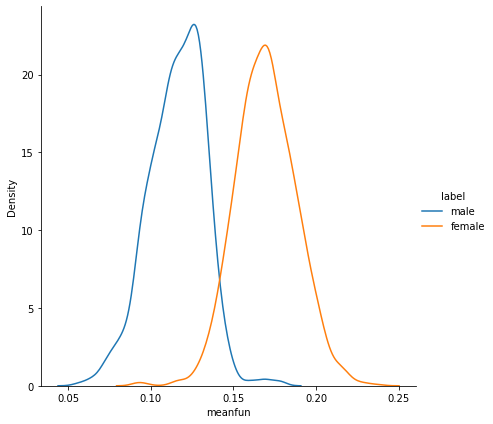

In [11]:
sns.FacetGrid(data, hue="label", size=6) \
   .map(sns.kdeplot, "meanfun") \
   .add_legend()
plt.show()